In [1]:
import os
import nltk
import pandas as pd
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/viralthakar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/viralthakar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/viralthakar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/viralthakar/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
import os
from paragraph_cleaner import ParagraphCleaner
from paragraph_analysis import ParagraphAnalysis
from utils import big_data_dict, styled_print, create_dir, extract_images, extract_paragraphs, \
    random_select_dict, combine_multiple_text_files


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
ddf = {i:val for i, val in enumerate(corpus)}
print(ddf)

{0: 'This is the first document.', 1: 'This document is the second document.', 2: 'And this is the third one.', 3: 'Is this the first document?'}


In [5]:
paragraph_cleaner = ParagraphCleaner(ddf)

In [6]:
cleaned_paragraphs = paragraph_cleaner.clean_paragraphs()
styled_print(f"Found Total {len(cleaned_paragraphs)} Paragraphs from the", header=True)

› Found Total 4 Paragraphs from the


In [7]:
cleaned_paragraphs

{0: 'first document',
 1: 'document second document',
 2: 'third one',
 3: 'first document'}

In [8]:
paragraph_analysis = ParagraphAnalysis(
    ddf, 
    out_dir="./dummy"
)
styled_print(f"Found {paragraph_analysis.words_counts} Words.", header=True)

› Found 26 Words.


In [9]:
paragraph_analysis.paragraphs_df.head()

,id,paragraphs,sentences,words,paragraph_chars_count,paragraph_words_count,paragraph_avg_word_len
0,0,This is the first document.,[This is the first document.],"[This, is, the, first, document, .]",27,6,3.833333
1,1,This document is the second document.,[This document is the second document.],"[This, document, is, the, second, document, .]",37,7,4.571429
2,2,And this is the third one.,[And this is the third one.],"[And, this, is, the, third, one, .]",26,7,3.000000
3,3,Is this the first document?,[Is this the first document?],"[Is, this, the, first, document, ?]",27,6,3.833333


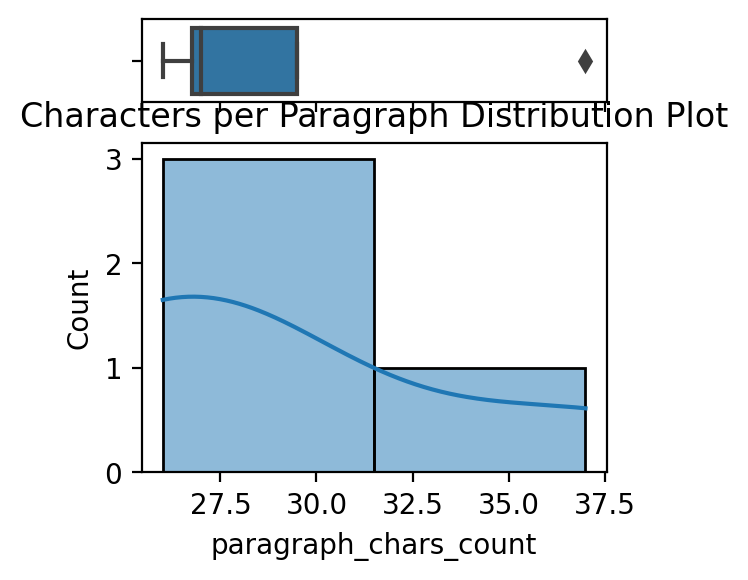

In [10]:
paragraph_analysis.characters_per_paragraph_histogram(
    figsize=(3, 3), dpi=200, save_flag=False
)

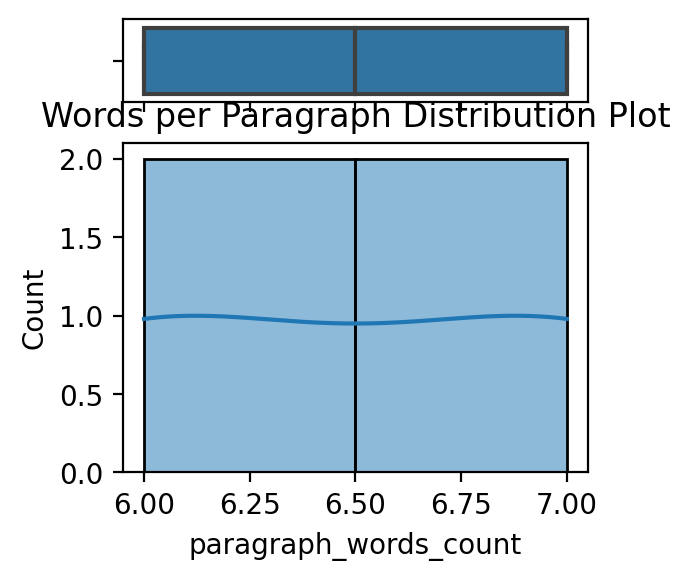

In [11]:
paragraph_analysis.words_per_paragraph_histogram(
    figsize=(3, 3), dpi=200, save_flag=False
)

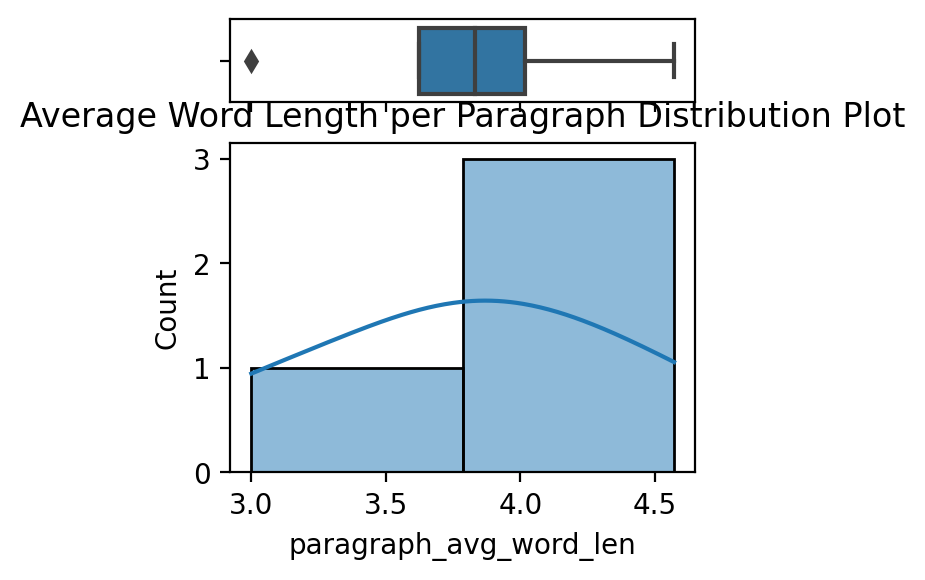

In [12]:
paragraph_analysis.avg_word_len_per_paragraph_histogram(
    figsize=(3, 3), dpi=200, save_flag=False
)

In [13]:
stop_words_corpus = paragraph_analysis.get_stop_words_corpus(language='english')
styled_print(f"Found {len(stop_words_corpus.keys())} unique stop words", header=True)

› Found 3 unique stop words


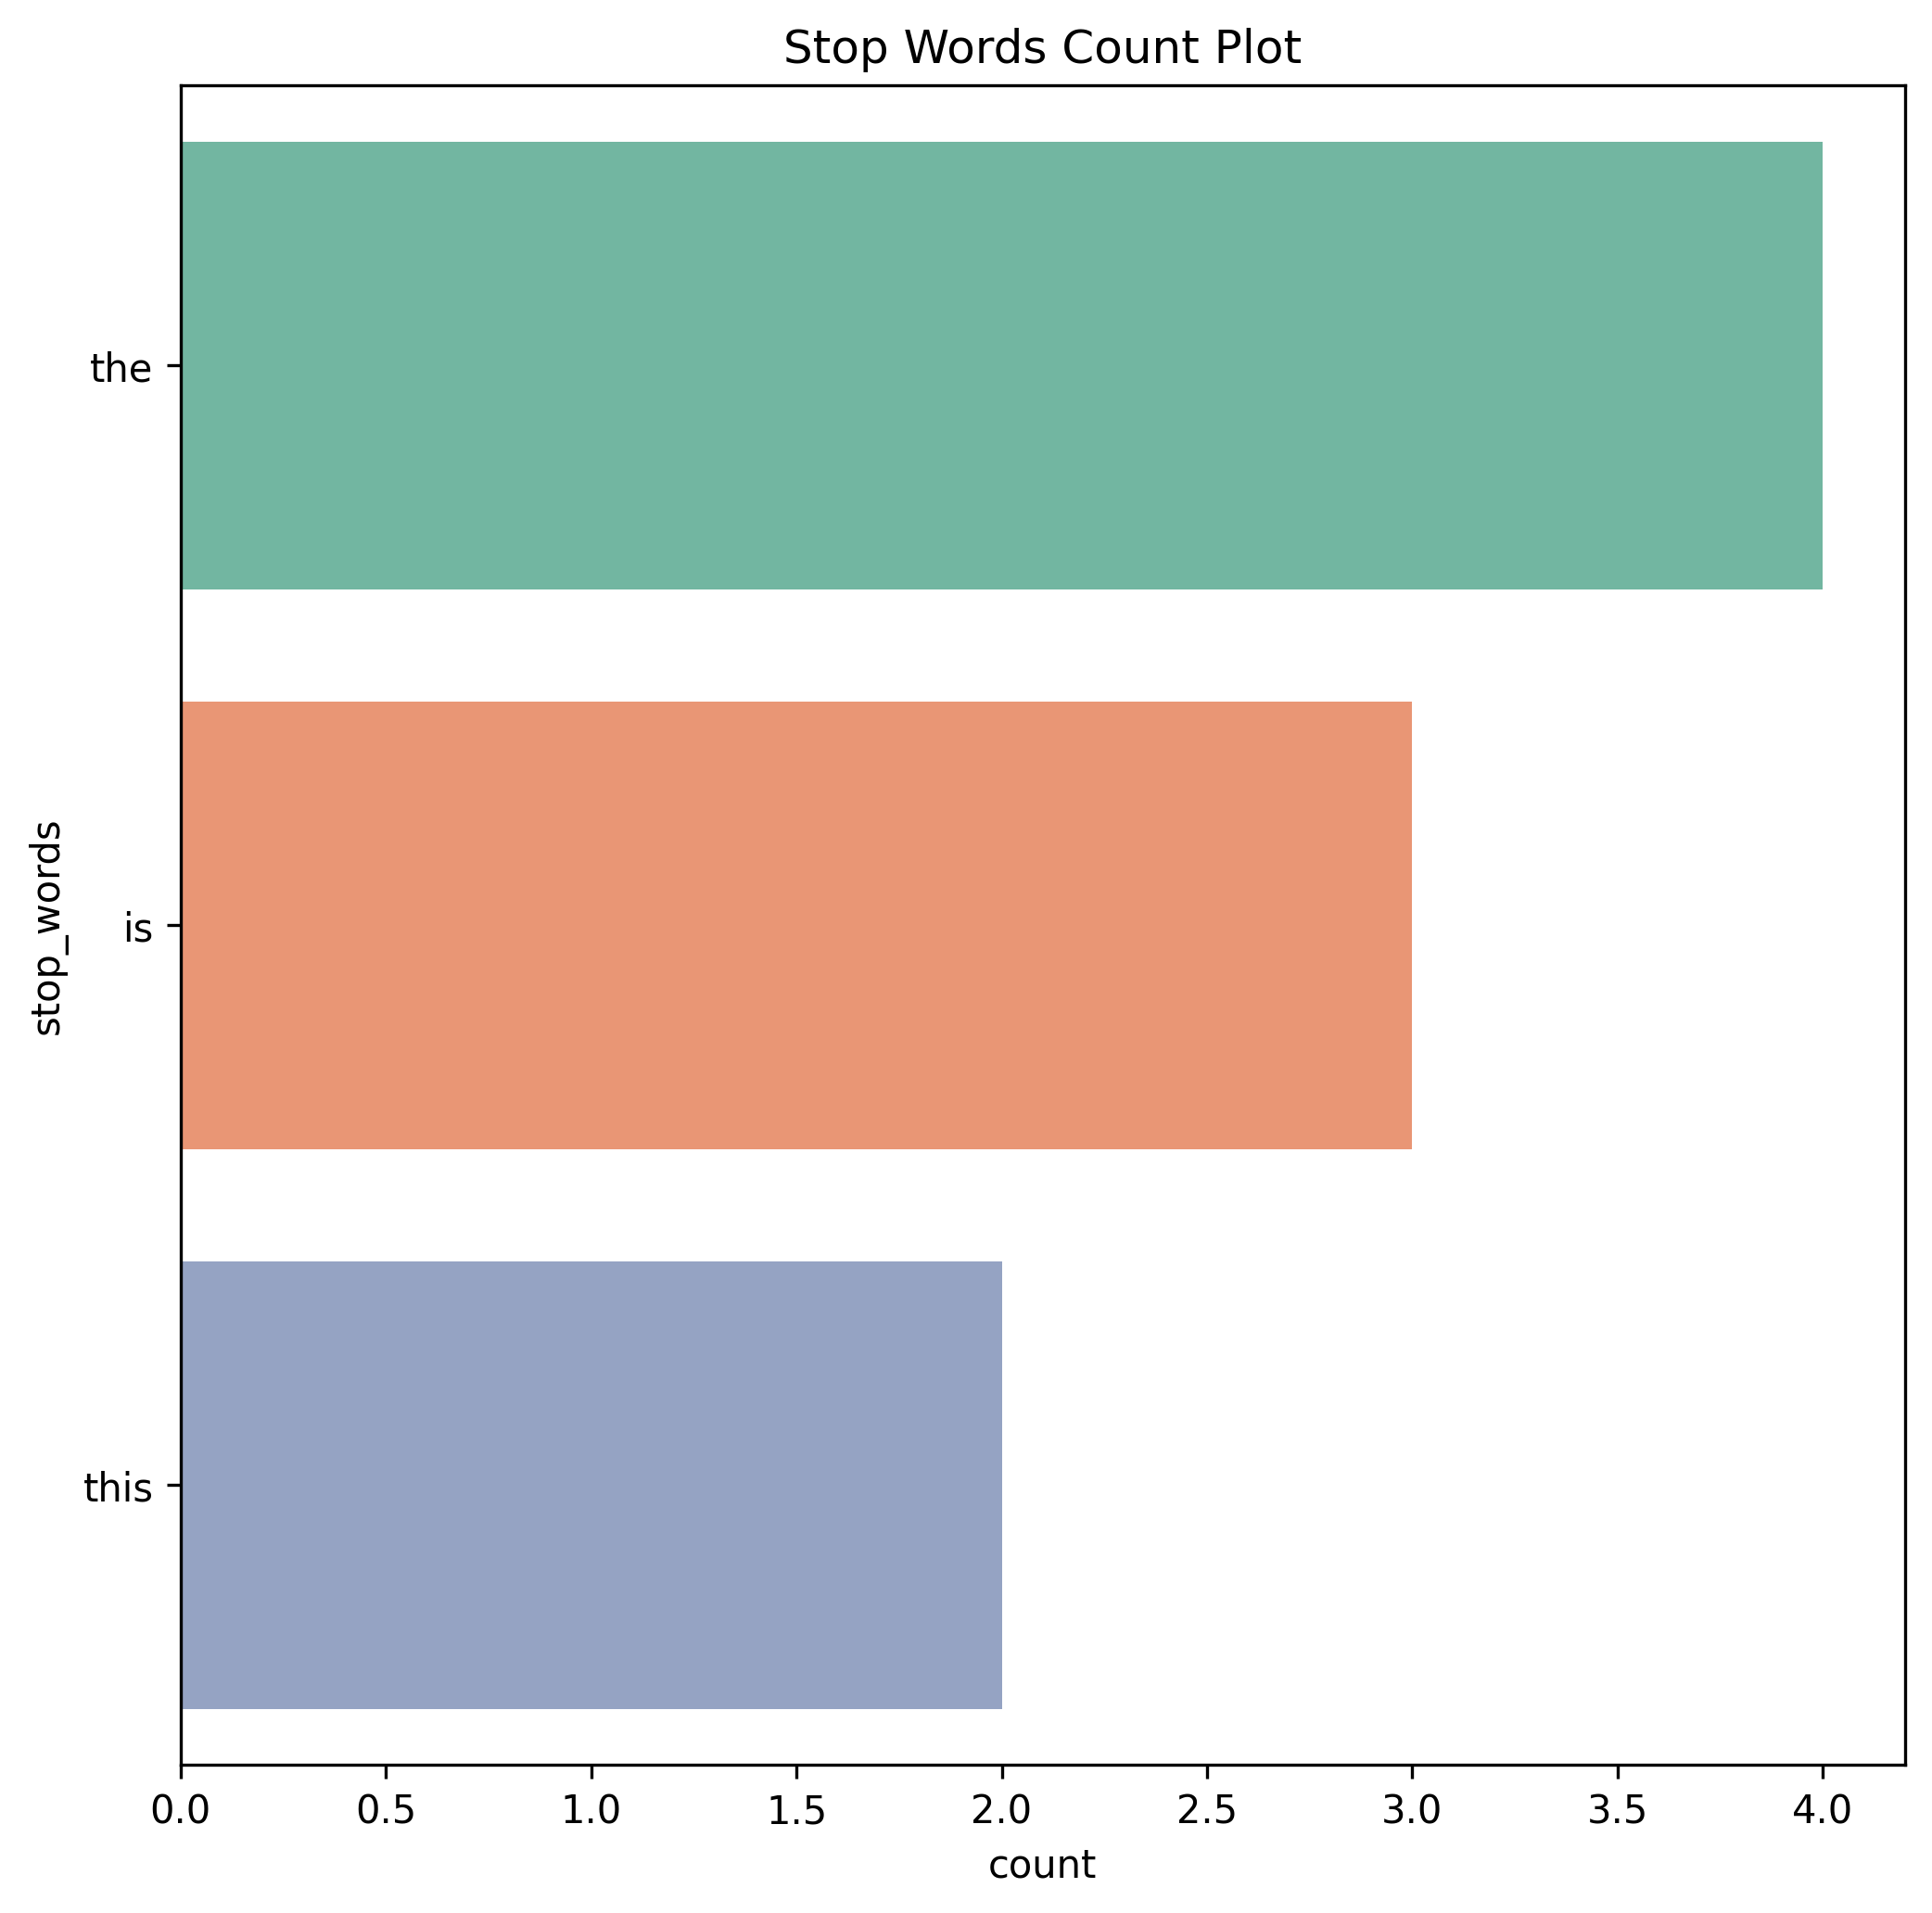

In [14]:
if len(stop_words_corpus.keys()) > 0:
    top_k = 25
    top_k_stop_words = paragraph_analysis.get_top_k_stop_words(stop_words_corpus, top_k=top_k)
    paragraph_analysis.plot_top_k_stop_words(
        top_k_stop_words, figsize=(8, 8), dpi=300, save_flag=False)

In [15]:
non_stop_words_corpus = paragraph_analysis.get_non_stop_words_corpus(language='english')
styled_print(f"Found {len(non_stop_words_corpus.keys())} unique non-stop words", header=True)

› Found 10 unique non-stop words


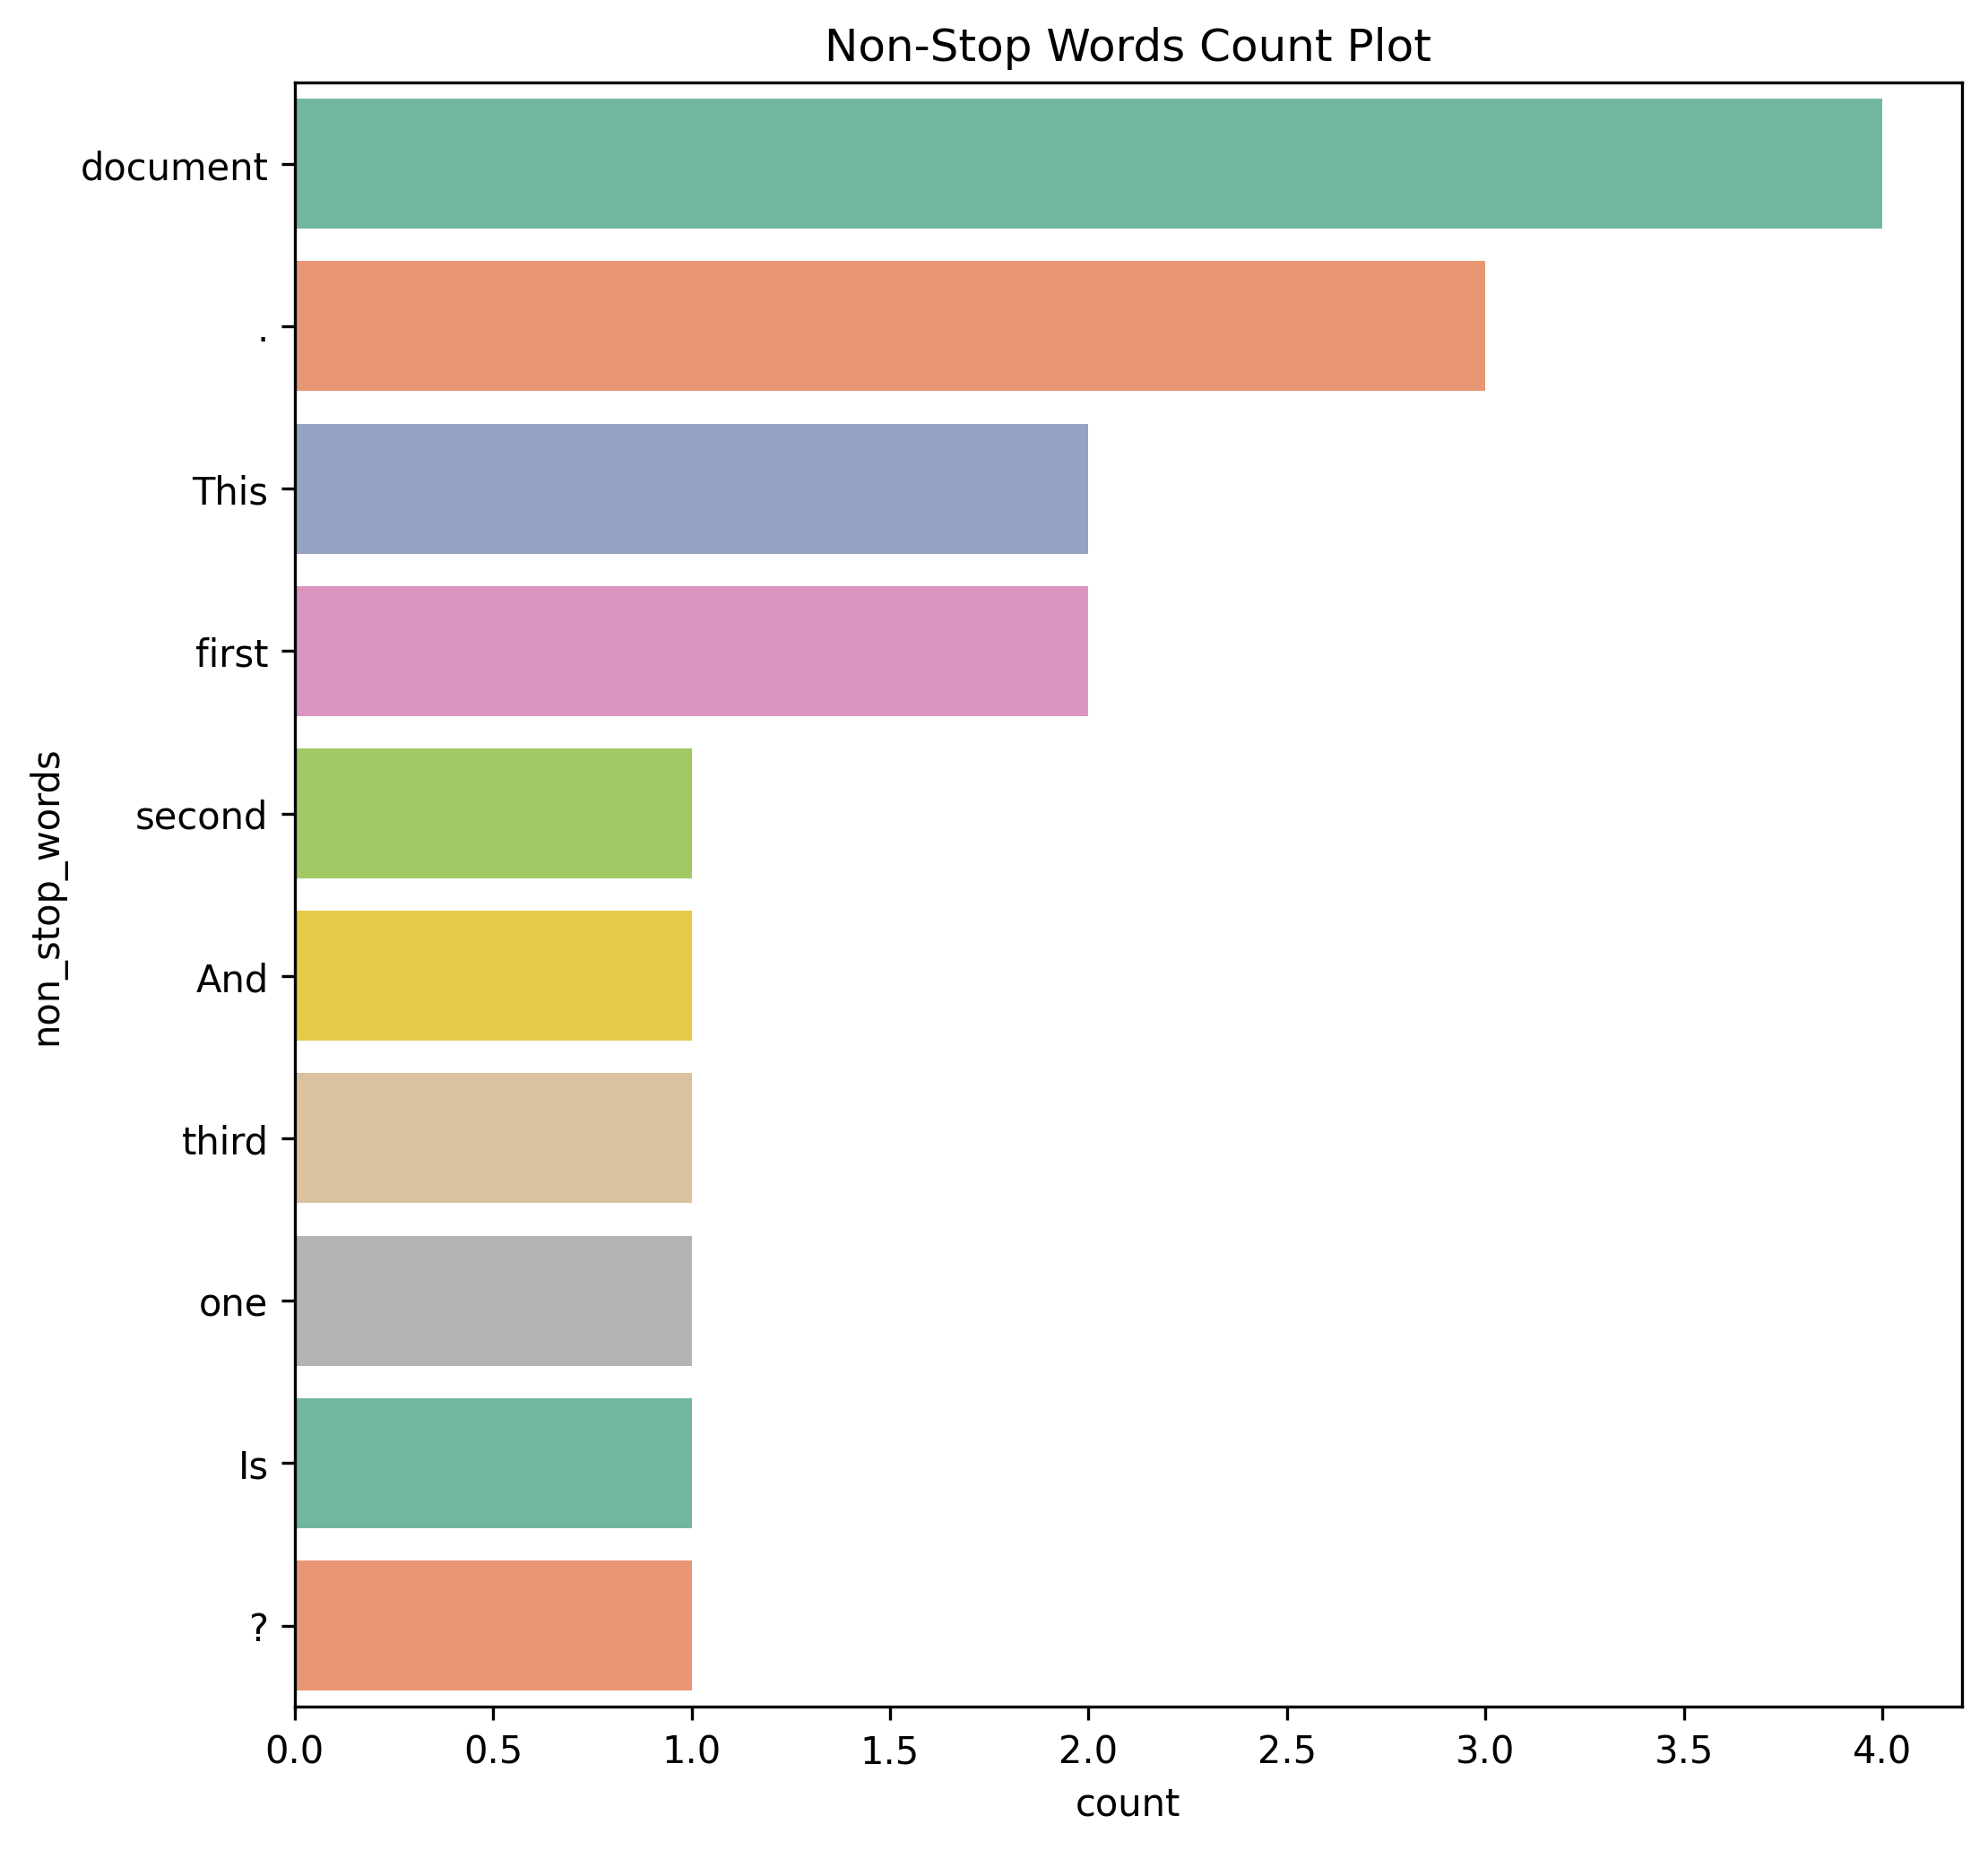

In [16]:
top_k = 25
top_k_non_stop_words = paragraph_analysis.get_top_k_non_stop_words(non_stop_words_corpus, top_k=top_k)
paragraph_analysis.plot_top_k_non_stop_words(
    top_k_non_stop_words, figsize=(8, 8), dpi=300, save_flag=False)

In [17]:
bigrams = paragraph_analysis.get_ngrams(n=2, return_list=True)
styled_print(f"Found {len(bigrams)} Bigrams", header=True)

› Found 25 Bigrams


In [18]:
bigrams

[('This', 'is'),
 ('is', 'the'),
 ('the', 'first'),
 ('first', 'document'),
 ('document', '.'),
 ('.', 'This'),
 ('This', 'document'),
 ('document', 'is'),
 ('is', 'the'),
 ('the', 'second'),
 ('second', 'document'),
 ('document', '.'),
 ('.', 'And'),
 ('And', 'this'),
 ('this', 'is'),
 ('is', 'the'),
 ('the', 'third'),
 ('third', 'one'),
 ('one', '.'),
 ('.', 'Is'),
 ('Is', 'this'),
 ('this', 'the'),
 ('the', 'first'),
 ('first', 'document'),
 ('document', '?')]

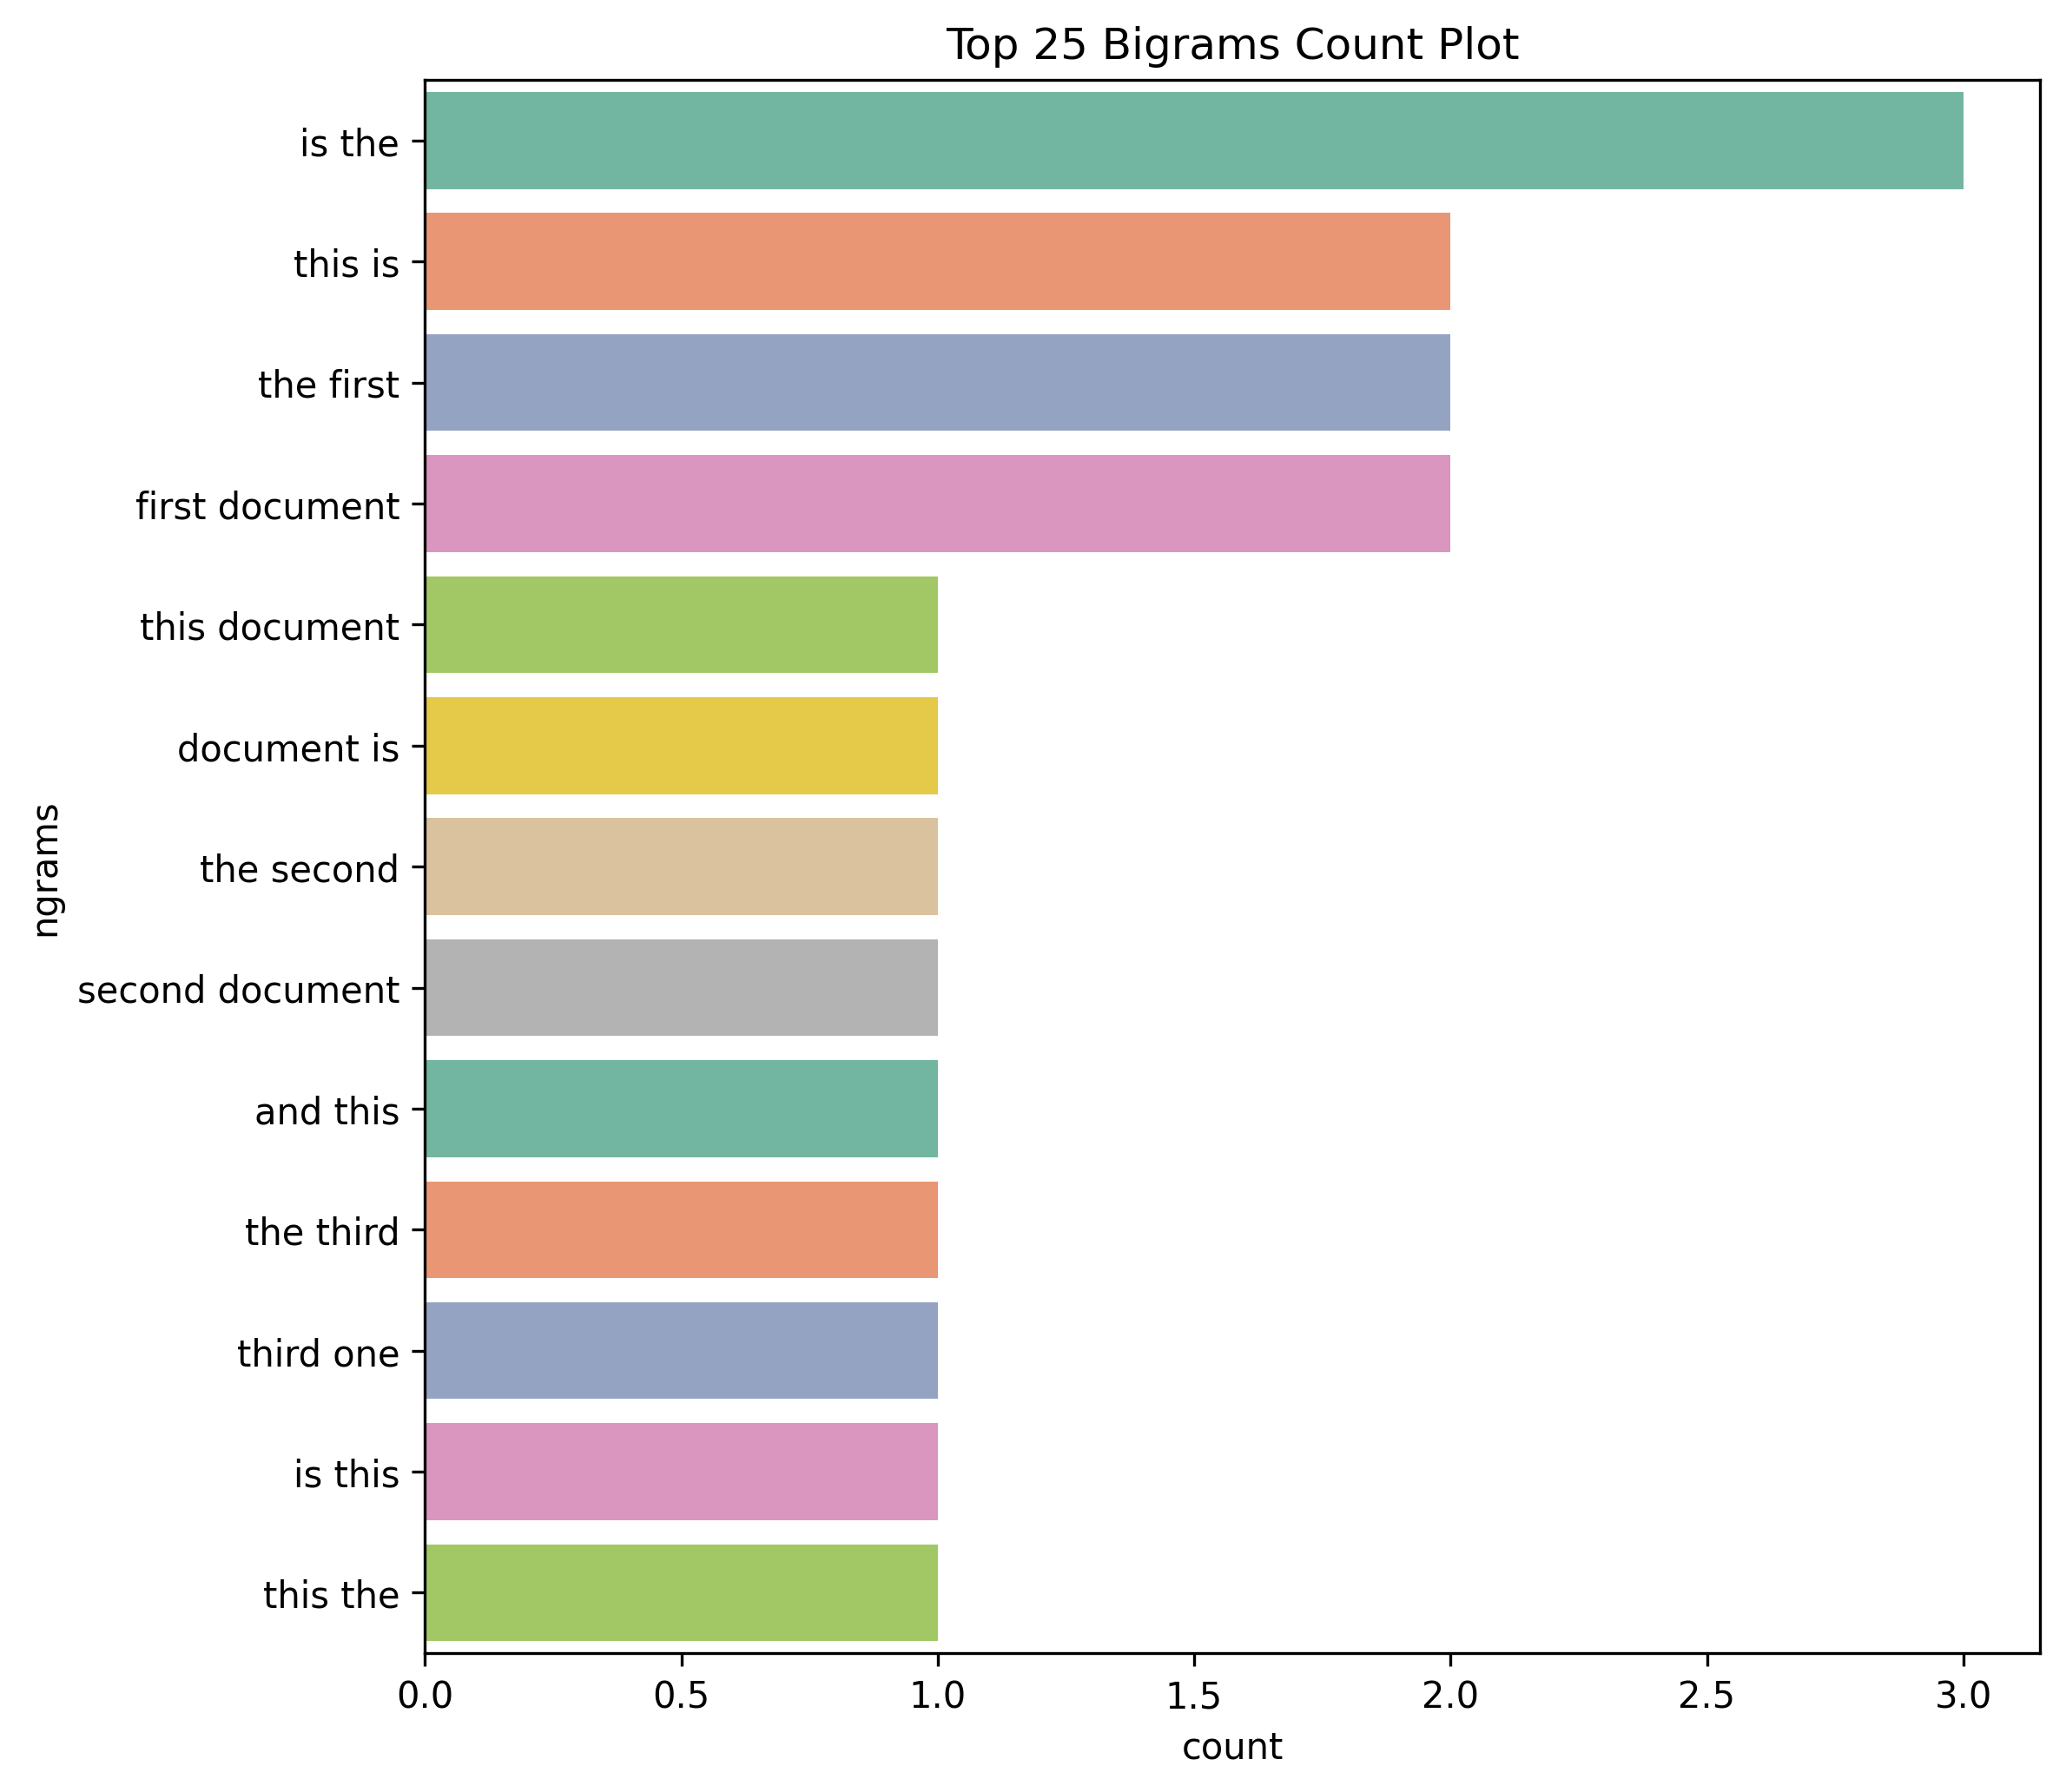

In [19]:
top_k = 25
top_k_bigrams = paragraph_analysis.get_top_k_ngrams(n=2, top_k=top_k)
paragraph_analysis.plot_top_k_ngrams(
    top_k_bigrams, title=f"Top {top_k} Bigrams Count Plot", figsize=(8, 8), dpi=300, save_flag=False)

In [20]:
trigrams = paragraph_analysis.get_ngrams(n=3, return_list=True)
styled_print(f"Found {len(trigrams)} Trigrams", header=True)

› Found 24 Trigrams


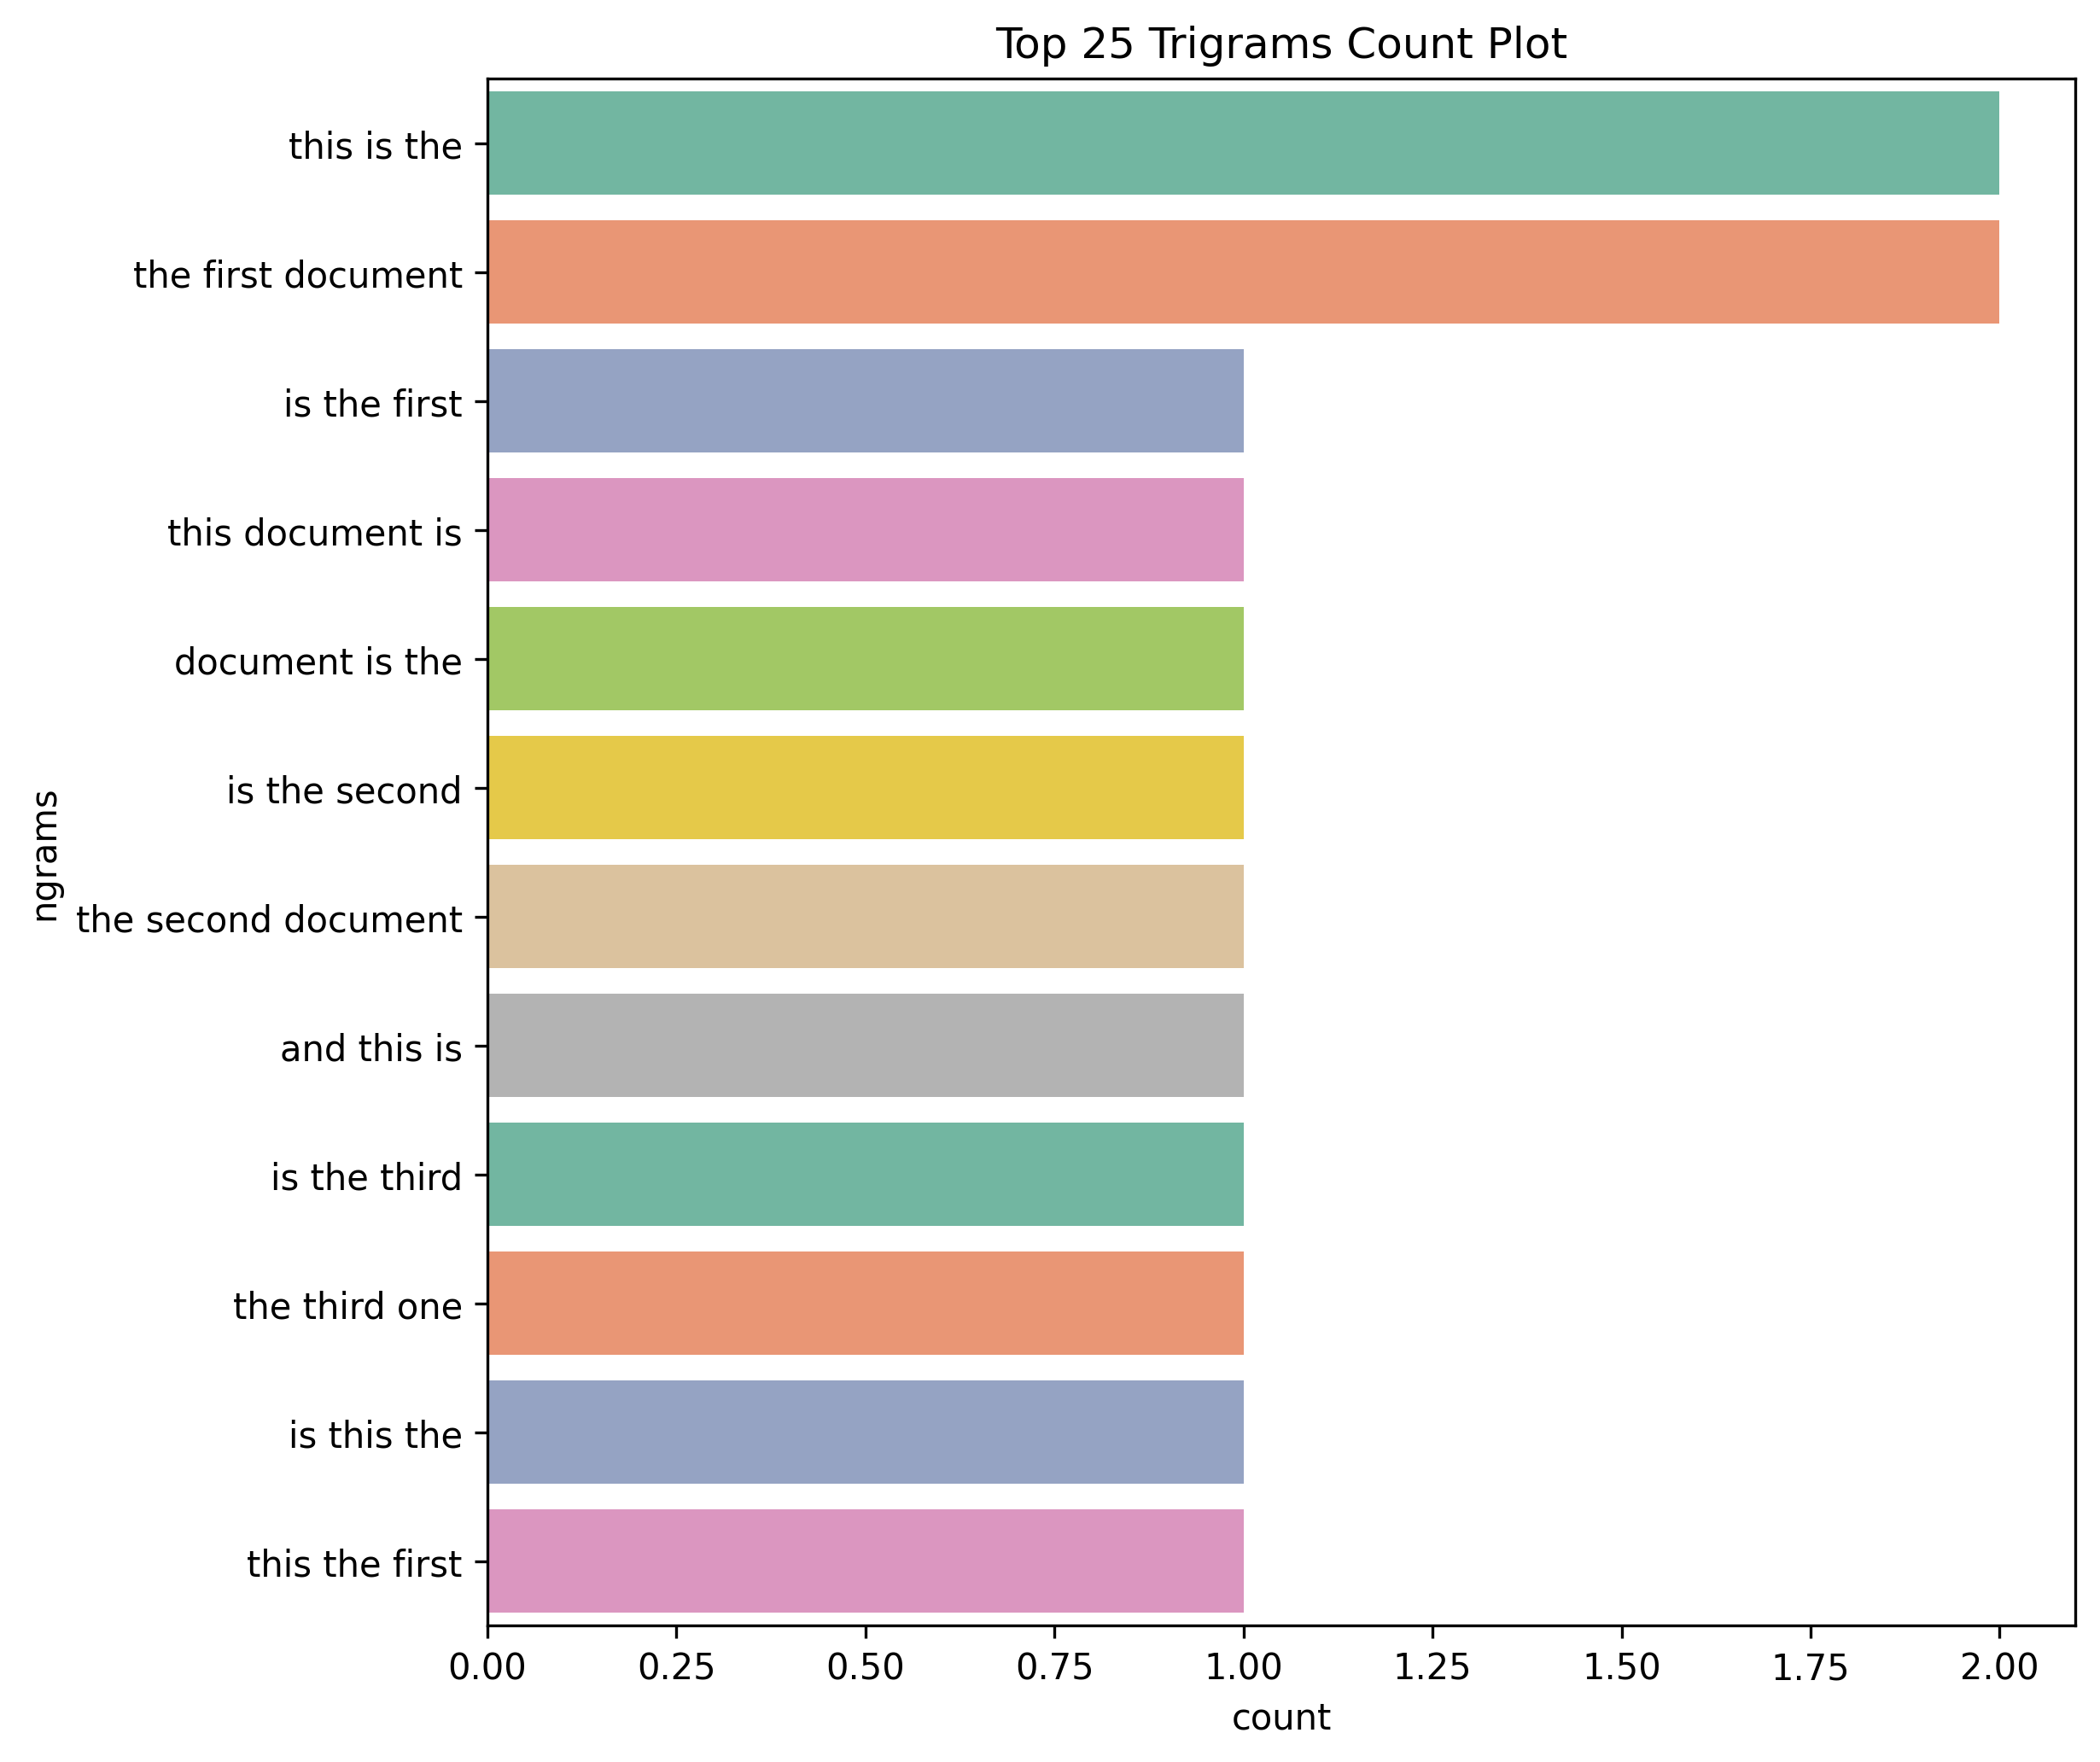

In [21]:
top_k = 25
top_k_trigrams = paragraph_analysis.get_top_k_ngrams(n=3, top_k=top_k)
paragraph_analysis.plot_top_k_ngrams(
    top_k_trigrams, 
    title=f"Top {top_k} Trigrams Count Plot", 
    figsize=(8, 8), 
    dpi=300, 
    save_flag=False
)

In [22]:
vectorizer, lda_model, lda_vectors = paragraph_analysis.build_lda(n_components=2)

In [23]:
paragraph_analysis.extract_topics(vectorizer, lda_model)

› Topic 0:
    › ('third', 0.5455255915818091)
    › ('and', 0.5455255813582227)
    › ('one', 0.5455255771389245)
    › ('the', 0.5367906903515292)
    › ('this', 0.5367906893943327)
    › ('is', 0.5367906874687092)
    › ('first', 0.5345762549706932)
    › ('document', 0.5326504588534389)
    › ('second', 0.5292205297337629)
› Topic 1:
    › ('document', 4.467349541146554)
    › ('is', 4.463209312531284)
    › ('this', 4.463209310605661)
    › ('the', 4.463209309648464)
    › ('first', 2.465423745029301)
    › ('second', 1.4707794702662311)
    › ('one', 1.4544744228610695)
    › ('and', 1.4544744186417713)
    › ('third', 1.4544744084181849)


## Bag of Words

In [26]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

sentence_1 = "Welcome to Great Learning, Now start learning"
sentence_2 = "Learning is a good practice"


CountVec = CountVectorizer(ngram_range=(1, 1),  # to use bigrams ngram_range=(2,2)
                           stop_words='english')
#transform
Count_data = CountVec.fit_transform([sentence_1, sentence_2])

#create dataframe
cv_dataframe = pd.DataFrame(
    Count_data.toarray(), columns=CountVec.get_feature_names_out())
print(cv_dataframe)

   good  great  learning  practice  start  welcome
0     0      1         2         0      1        1
1     1      0         1         1      0        0


In [27]:
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

CountVec = CountVectorizer(
    ngram_range=(1, 1),
    stop_words='english'
)
#transform
Count_data = CountVec.fit_transform(corpus)

#create dataframe
cv_dataframe = pd.DataFrame(
    Count_data.toarray(), columns=CountVec.get_feature_names_out())
print(cv_dataframe)


   document  second
0         1       0
1         2       1
2         0       0
3         1       0


In [29]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]


#without smooth IDF
print("Without Smoothing:")
#define tf-idf
tf_idf_vec = TfidfVectorizer(
    use_idf=True,
    smooth_idf=False,
    ngram_range=(1, 1), 
    stop_words='english'
)

#transform
tf_idf_data = tf_idf_vec.fit_transform(corpus)

#create dataframe
tf_idf_dataframe = pd.DataFrame(
    tf_idf_data.toarray(), 
    columns=tf_idf_vec.get_feature_names_out()
)
print(tf_idf_dataframe)


Without Smoothing:
   document    second
0   1.00000  0.000000
1   0.73352  0.679668
2   0.00000  0.000000
3   1.00000  0.000000
